# Aufgabe 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal

In [9]:
% matplotlib inline

In [10]:
df = pd.read_csv('2d-em.csv',header=None)

In [11]:
data = df.as_matrix()

In [12]:
data

array([[-2.76141025, -3.11299076],
       [ 4.00736258,  3.71590642],
       [ 2.49273928,  2.5063457 ],
       ..., 
       [-0.59834098, -2.99436545],
       [-3.64272931,  0.79219991],
       [-2.10190378, -1.9862288 ]])

In [13]:
data.shape

(3000, 2)

In [14]:
def get_xy(data):
    x = data[:,0]
    y = data[:,1]
    return x,y

In [15]:
x,y = get_xy(data)

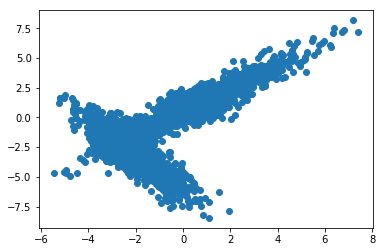

In [16]:
plt.scatter(x, y)

In [17]:
class em_cluster():
    def fit(self, k, X, num_iteration, measure = 'M'):
        # initialize covariance matrix dictionary and mean dictionary
        # for each cluster there will be one covariance matrix and one mean stored
        # in these two dictionaries
        
        # covariance matrix dictionary
        self.covmatrix_dict = {}
        for i in range(k):
            self.covmatrix_dict[i] = np.identity(X.shape[1])
        
        
        # mean dictionary
        self.mean_dict = {}
        for i in range(k):
            index = np.random.choice(X.shape[0])
            self.mean_dict[i] = X[index]
        
        # initialize norm value list for plotting norm value plot
        self.norm_lst = []
            
        # using the Mahalanobis distance
        if measure == 'M':
            for _ in range(num_iteration):
                dist_array = np.zeros((k, X.shape[0]))
                for i in self.covmatrix_dict:
                    distance = ((X - self.mean_dict[i]).dot(np.linalg.inv(self.covmatrix_dict[i]))).dot((X-self.mean_dict[i]).T)
                    dist_array[i,:] = np.diag(distance)                
                
                cluster_lst = np.argmin(dist_array, axis = 0)
                
                sum_norm = 0
                for i in range(k):
                    self.covmatrix_dict[i] = np.cov(X[cluster_lst == i], rowvar=False)
                    self.mean_dict[i] = np.mean(X[cluster_lst == i], axis = 0)
                    sum_norm += np.linalg.norm(self.covmatrix_dict[i])
                self.norm_lst.append(sum_norm)
            
            self.result = cluster_lst
        
        # using the multivariate normal distribution
        if measure == 'N':
            for _ in range(num_iteration):
                prob_array = np.zeros((k, X.shape[0]))
                
                for i in self.covmatrix_dict:
                    # using function from scipy 
                    prob = multivariate_normal.pdf(X, self.mean_dict[i], self.covmatrix_dict[i])
                    prob_array[i,:] = prob
                    
                cluster_lst = np.argmax(prob_array, axis = 0)
                
                sum_norm = 0
                for i in range(k):
                    self.covmatrix_dict[i] = np.cov(X[cluster_lst == i], rowvar=False)
                    self.mean_dict[i] = np.mean(X[cluster_lst == i], axis = 0)
                    sum_norm += np.linalg.norm(self.covmatrix_dict[i])
                self.norm_lst.append(sum_norm)
            
            self.result = cluster_lst

In [192]:
k_lst = [2,3,4]
n = 100

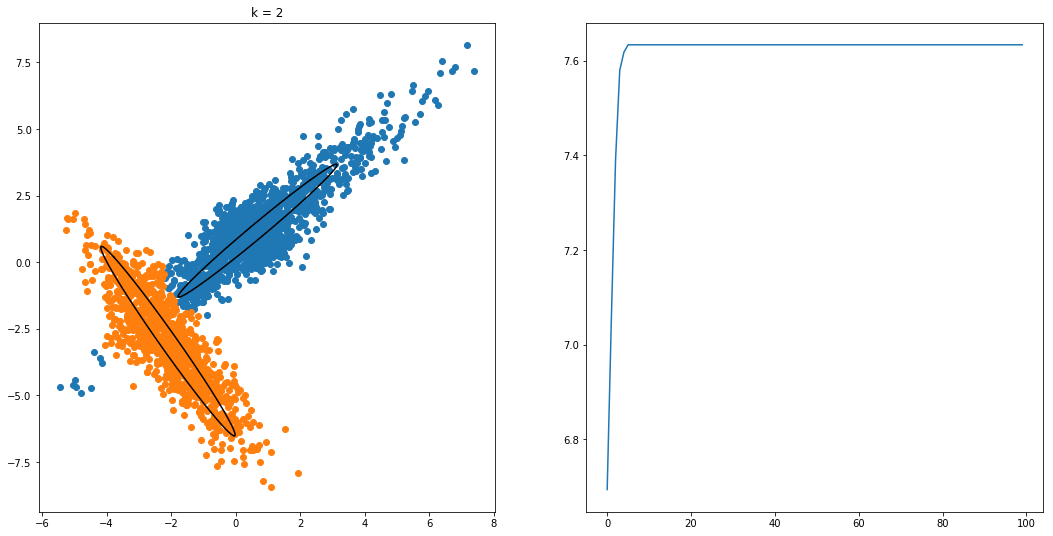

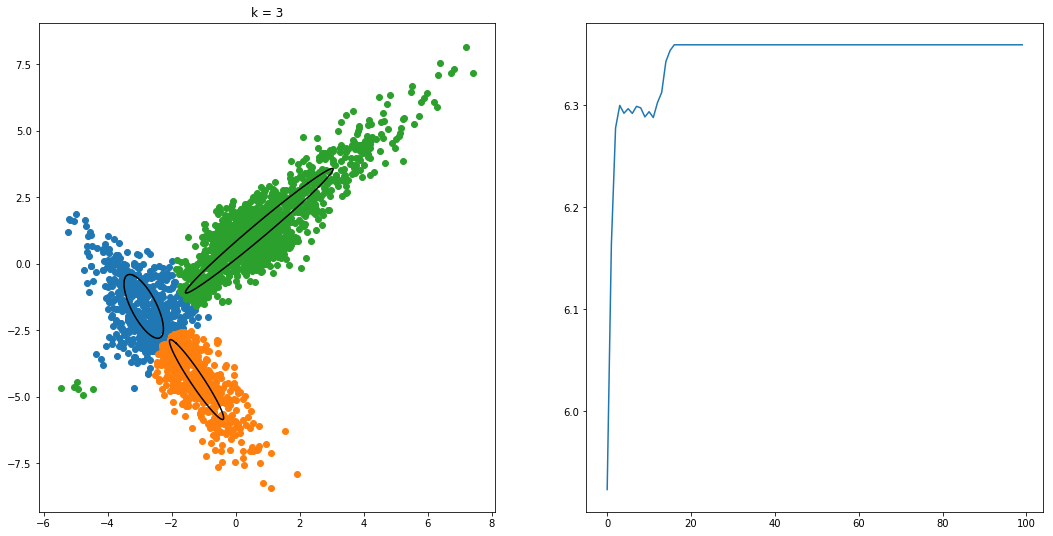

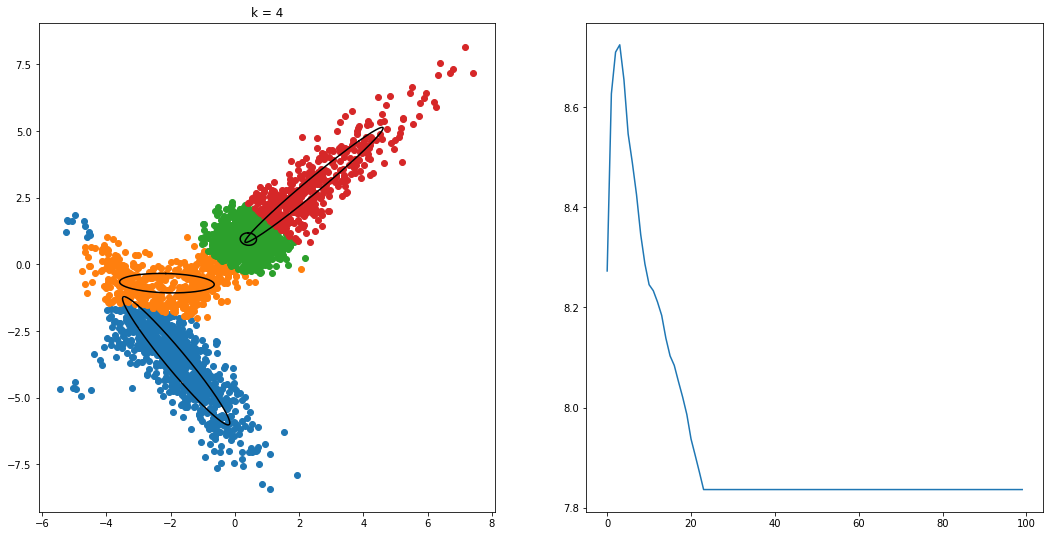

In [193]:
cluster = em_cluster()

for k in k_lst:
    plt.figure(k)
    plt.figure(figsize=(18,9))
    
    cluster.fit(k, data, num_iteration=n, measure='N')
    
    sub_image = 1
    plt.subplot(1,2,sub_image)
    
    for type_cluster in np.unique(cluster.result):
        x,y = get_xy(data[cluster.result == type_cluster])
        plt.title("k = " + str(k))
        plt.scatter(x, y)
        
        num_points = 1000
        radius = 1
        arcs = np.linspace(0, 2 * np.pi, num_points)
        cx = radius * np.sin(arcs) 
        cy = radius * np.cos(arcs)
        
        xy = np.array(zip(cx, cy))

        cx, cy = zip(*xy.dot(cluster.covmatrix_dict[type_cluster]))
        plt.plot(cx + cluster.mean_dict[type_cluster][0], cy+cluster.mean_dict[type_cluster][1], color = 'black')

    sub_image += 1
    
    plt.subplot(1,2,sub_image)
    plt.plot(range(n), cluster.norm_lst)

Using the norm value of the covariance matrix plot, it is clear that when k = 2, after 100 iterations, it achieve the highest value(around 7.6)

# Aufgabe 2

In [18]:
import matplotlib.image as mpimg

In [38]:
path = './test.jpg'

In [39]:
def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

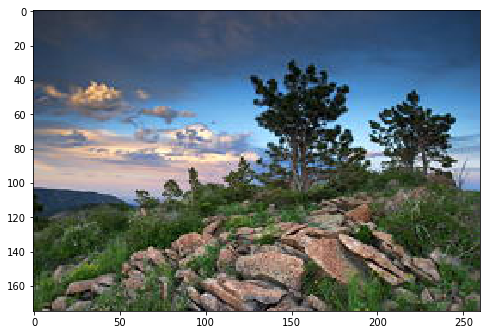

(175, 260, 3)
(45500, 3)


In [48]:
img = mpimg.imread(path)
show_img(img)
print img.shape
rows = img.shape[0]
cols = img.shape[1]
img = img.reshape(img.shape[0] * img.shape[1], 3)
print img.shape

In [49]:
k = 10

In [50]:
img_cluster = em_cluster()
img_cluster.fit(k, img, num_iteration = 3, measure = 'N')

In [51]:
img_cluster.mean_dict

{0: array([ 127.26211352,  138.21550531,  148.95523766]),
 1: array([ 130.80633803,  190.62022133,  234.73742455]),
 2: array([  77.34973735,  127.66132154,  177.82996959]),
 3: array([ 126.83072207,  115.71355586,  107.32220708]),
 4: array([ 185.85149891,  164.64919595,  158.29461981]),
 5: array([ 79.0454399 ,  77.38543345,  61.86110216]),
 6: array([ 42.34733867,  55.92284503,  31.12501178]),
 7: array([ 49.10760781,  66.89829129,  91.79841334]),
 8: array([  90.85778204,  101.4119527 ,   76.0917226 ]),
 9: array([  59.90025751,   84.2216309 ,  118.1095279 ])}

In [52]:
for type_cluster in np.unique(img_cluster.result):
    img[img_cluster.result == type_cluster] = img_cluster.mean_dict[type_cluster]

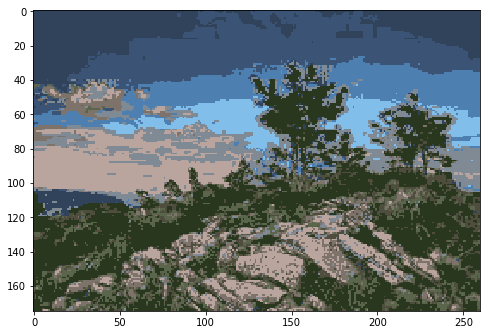

In [53]:
plt.figure
plt.figure(figsize=(8,8))
show_img(img.reshape(175, 260,3 ))